# コンダクタンスベースモデル
## Hodgkin-Huxleyモデル
**Hodgkin-Huxleyモデル** (HH モデル)は, ニューロンの膜興奮を表現する，初めに導出された数理モデルである {cite:p}`Hodgkin1952-gy`\footnote{{cite:p}`Hopper2022-xj`はHodgkinおよびHuxleyの論文の図をカラー化して分かりやすくしたものである．}．HodgkinおよびHuxleyはヤリイカの巨大神経軸索に対して**電位固定法**(voltage-clamp)を用いた実験を行い, 実験から得られた観測結果を元にモデルを構築した {cite:p}`Schwiening2012-pi`．HHモデルには等価な電気回路モデルがあり, **膜の並列等価回路モデル** (parallel conductance model)と呼ばれている．膜の並列等価回路モデルでは, ニューロンの細胞膜をコンデンサ, 細胞膜に埋まっているイオンチャネルを可変抵抗 (動的に変化する抵抗) として置き換える．

**イオンチャネル** (ion channel)は特定のイオン(例えばナトリウムイオンやカリウムイオンなど)を選択的に通す膜輸送体の一種である．それぞれのイオンの種類において, 異なるイオンチャネルがある (同じイオンでも複数の種類のイオンチャネルがある)．また, イオンチャネルにはイオンの種類に応じて異なる**コンダクタンス**(抵抗の逆数で電流の「流れやすさ」を意味する)と**平衡電位**(equilibrium potential)がある．HHモデルでは, ナトリウム(Na$^{+}$)チャネル, カリウム(K$^{+}$)チャネル, 漏れ電流(leak current)のイオンチャネルを仮定する．漏れ電流のイオンチャネルは当時特定できなかったチャネルで, 膜から電流が漏れ出すチャネルを意味する．なお, 現在では漏れ電流の多くはCl$^{-}$イオン(chloride ion)によることが分かっている．

それでは, 等価回路モデルを用いて電位変化の式を立ててみよう．上図において, $C_m$は細胞膜のキャパシタンス(膜容量), $I_{m}(t)$は細胞膜を流れる電流(外部からの入力電流), $I_\text{Cap}(t)$は膜のコンデンサを流れる電流, $I_\text{Na}(t)$及び $I_K(t)$はそれぞれナトリウムチャネルとカリウムチャネルを通って膜から流出する電流, $I_\text{L}(t)$は漏れ電流である．このとき, 

$$
\begin{equation}
I_{m}(t)=I_\text{Cap}(t)+I_\text{Na}(t)+I_\text{K}(t)+I_\text{L}(t)    
\end{equation}
$$

という仮定をしている．膜電位を$V(t)$とすると, Kirchhoffの第二法則 (Kirchhoff's Voltage Law)より, 

$$
\begin{equation}
\underbrace{C_m\frac {dV(t)}{dt}}_{I_\text{Cap} (t)}=I_{m}(t)-I_\text{Na}(t)-I_\text{K}(t)-I_\text{L}(t)
\end{equation}
$$

となる．Hodgkinらはチャネル電流$I_\text{Na}, I_K, I_\text{L}$が従う式を実験的に求めた．

$$
\begin{align}
I_\text{Na}(t) &= \bar{g}_{\text{Na}}\cdot m^{3}h(V-E_{\text{Na}})\\
I_\text{K}(t) &= \bar{g}_{\text{K}}\cdot n^{4}(V-E_{\text{K}})\\
I_\text{L}(t) &= \bar{g}_{\text{L}}(V-E_{\text{L}})
\end{align}
$$

ただし, $\bar{g}_{\text{Na}}, \bar{g}_{\text{K}}$はそれぞれNa$^+$, K$^+$の最大コンダクタンスである (ここで上付き棒は上限値であることを示す)．$\bar{g}_{\text{L}}$はオームの法則に従うコンダクタンスで, Lコンダクタンスは時間的に変化はしないと仮定する．また, $m$はNa$^+$コンダクタンスの活性化パラメータ, $h$はNa$^+$コンダクタンスの不活性化パラメータ, $n$はK$^+$コンダクタンスの活性化パラメータであり, ゲートの開閉確率を表している．よって, HHモデルの状態は$V, m, h, n$の4変数で表される．これらの変数は以下の$x$を$m, n, h$に置き換えた3つの微分方程式に従う． 

$$
\begin{equation}
\frac{dx}{dt}=\alpha_{x}(V)(1-x)-\beta_{x}(V)x
\end{equation}
$$

ただし, $V$の関数である$\alpha_{x}(V),\ \beta_{x}(V)$は$m, h, n$によって異なり, 次の6つの式に従う．

$$
\begin{equation}
\begin{array}{ll}
\alpha_{m}(V)=\dfrac {0.1(V+40)}{1-\exp (-0.1(V+40))}, &\beta_{m}(V)=4\exp {(-(V+65)/18)}\\
\alpha_{h}(V)=0.07\exp {(-0.05(V+65))}, & \beta_{h}(V)=1/(1+{\exp {\left(-0.1(V+35)\right)}})\\
\alpha_{n}(V)={\dfrac {0.01(V+55)}{1-\exp {\left(-0.1(V+55)\right)}}},& \beta_{n}(V)=0.125\exp {(-0.0125(V+65))} 
\end{array}
\end{equation}
$$

これまでに説明した式を用いてHHモデルを実装する．まず必要なパッケージを読み込む．

In [1]:
using Parameters: @unpack # or using UnPack
using PyPlot
rc("axes.spines", top=false, right=false)

In [2]:
abstract type Layer end
abstract type Neuron <: Layer end
abstract type SpikeNeuron <: Neuron end

abstract type Synapse <: Layer end

変更しない定数を保持する `struct` の `HHParameter` と, 変数を保持する `mutable struct` の `HH` を作成する．定数は次のように設定する． 

$$
\begin{equation}
\begin{array}{l}
C_m=1.0\ \mu\textrm{F/cm}^2, \bar{g}_{\text{Na}}=120\ \textrm{mS/cm}^2, \bar{g}_{\text{K}}=36\ \textrm{mS/cm}^2, \bar{g}_{\text{L}}=0.3\ \textrm{mS/cm}^2\\
E_{\text{Na}}=50.0\ \textrm{mV}, E_{\text{K}}=-77\ \textrm{mV}, E_{\text{L}}=-54.387\ \textrm{mV} 
\end{array}
\end{equation}
$$


In [3]:
@kwdef struct HHParameter{FT}
    Cm::FT = 1 # 膜容量(uF/cm^2)
    gNa::FT = 120; gK::FT = 36; gL::FT = 0.3 # Na+, K+, leakの最大コンダクタンス(mS/cm^2)
    ENa::FT = 50; EK::FT = -77; EL::FT = -54 # Na+, K+, leakの平衡電位(mV)
end

@kwdef mutable struct HH{FT} <: SpikeNeuron
    num_neurons::UInt16
    dt::FT = 1e-3
    param::HHParameter = HHParameter{FT}()
    v::Vector{FT} = fill(-65, num_neurons)
    m::Vector{FT} = fill(0.05, num_neurons) 
    h::Vector{FT} = fill(0.6, num_neurons)
    n::Vector{FT} = fill(0.32, num_neurons)
end

In [4]:
function update!(neuron::HH, Iext::Vector)
    @unpack num_neurons, dt, v, m, h, n = neuron
    @unpack Cm, gNa, gK, gL, ENa, EK, EL = neuron.param
    @inbounds for i = 1:num_neurons
        αm = 0.1(v[i]+40)/(1 - exp(-0.1(v[i]+40)))
        βm = 4exp(-(v[i]+65)/18)
        αh = 0.07exp(-0.05*(v[i]+65))
        βh = 1/(1 + exp(-0.1*(v[i]+35)))
        αn = 0.01(v[i]+55)/(1 - exp(-0.1(v[i]+55)))
        βn = 0.125exp(-0.0125(v[i]+65))
        
        m[i] += dt * (αm *(1 - m[i]) - βm * m[i])
        h[i] += dt * (αh *(1 - h[i]) - βh * h[i])
        n[i] += dt * (αn *(1 - n[i]) - βn * n[i])
        
        INa = gNa * m[i]^3 * h[i] * (v[i] - ENa)
        IK = gK * n[i]^4 * (v[i] - EK)
        IL = gL * (v[i] - EL)
        
        v[i] += dt / Cm * (Iext[i] - INa - IK - IL)
    end
    return v
end

(layer::Layer)(x) = update!(layer, x)

次に変数を更新する関数`update!`を書く．ソルバーとしては陽的Euler法または4次のRunge-Kutta法を用いる．以下ではEuler法を用いている．Juliaではforループを用いて1つのニューロンごとにパラメータを更新する方がベクトルを用いるよりも高速である．

### Hodgkin-Huxleyモデルのシミュレーションの実行
いくつかの定数を設定してシミュレーションを実行する．

In [52]:
T = 450 # ms
dt = 0.01 # ms
nt = Int(T/dt) # number of timesteps
num_neurons = 1 # number of neurons
time = (1:nt)*dt # time array
Ie = repeat(10 * ((time .> 50) - (time .> 200)) + 35 * ((time .> 250) - (time .> 400)), 1, num_neurons)  # injection current
varr, gatearr = zeros(nt, num_neurons), zeros(nt, 3, num_neurons) # 記録用

hh_neurons = HH{Float32}(num_neurons=num_neurons, dt=dt) # modelの定義

# simulation
@time for t = 1:nt
    v = hh_neurons(Ie[t, :])
    varr[t, :] = v
    gatearr[t, :, :] .= [hh_neurons.m; hh_neurons.h; hh_neurons.n]
end

  0.273757 seconds (2.16 M allocations: 40.444 MiB, 21.35% gc time)


ニューロンの膜電位 `v`, ゲート変数 `m, h, n`, 刺激電流 `Ie`の描画をする．

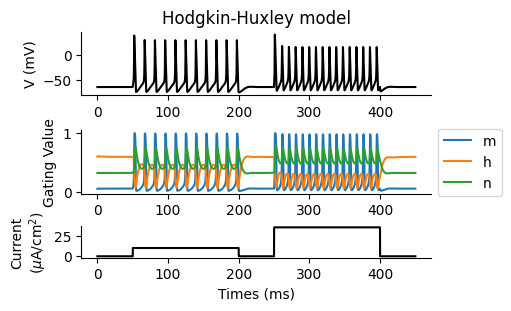

PyObject Text(0.5, 24.0, 'Times (ms)')

In [55]:
fig, axes = subplots(3,1, figsize=(5, 3), height_ratios=[1, 1, 0.5], constrained_layout=true) 
axes[1].set_title("Hodgkin-Huxley model")
axes[1].plot(time, varr[:, 1], color="black"); axes[1].set_ylabel("V (mV)")

labellist=["m" "h" "n"] 
for i in 1:3
    axes[2].plot(time, gatearr[:, i, 1], label=labellist[i])
end; 
axes[2].set_ylabel("Gating Value"); axes[2].legend(loc="center left", bbox_to_anchor=(1, 0.5))
axes[3].plot(time, Ie[:, 1], color="black"); 
axes[3].set_ylabel("Current\n"*L"($\mu$A/cm$^2$)"); axes[3].set_xlabel("Times (ms)")

次項で用いるために発火回数を求める．ここでは膜電位が0を超えた点を数えることで，簡易的に求める．

In [7]:
function get_num_spikes(varr)
    spike = (varr[1:end-1, :] .< 0) .& (varr[2:end, :] .> 0)
    return sum(spike, dims=1)
end

num_spikes = get_num_spikes(varr)
println("Num. of spikes : ", num_spikes[1])

Num. of spikes : 27


50msから200msまでで11回, 250msから400msまでで16回発火しているので発火回数は計27回であり，この結果は正しい．

## Connor-Stevensモデル
HHモデルはイカの巨大軸索の活動を再現したものであるが，脊椎動物のニューロンの神経活動を再現するためにHHモデルを修正したモデル (modified Hodgkin-Huxley model) が提案されてきた．その一種である，**Connor-Stevensモデル** はHHモデルに2つ目のカリウム電流（A型カリウム電流）を追加し，低い発火率でも活動を維持できる（振動を維持できる）ようにしたものである {cite:p}`Connor1971-rs,Connor1977-qo`．ここでパラメータは{cite:p}`Dayan2005-ib`に記載のものを使用する．

$$
\begin{equation}
\begin{array}{l}
C_m=1.0\ \mu\textrm{F/cm}^2,\\ 
\bar{g}_{\text{Na}}=120\ \textrm{mS/cm}^2, \bar{g}_{\text{K}}=20\ \textrm{mS/cm}^2, \bar{g}_{\text{A}}=47.7\ \textrm{mS/cm}^2, \bar{g}_{\text{L}}=0.3\ \textrm{mS/cm}^2\\
E_{\text{Na}}=55.0\ \textrm{mV}, E_{\text{K}}=-72\ \textrm{mV}, E_{\text{A}}=-75\ \textrm{mV},E_{\text{L}}=-17\ \textrm{mV} 
\end{array}
\end{equation}
$$

$$
\begin{equation}
\begin{array}{ll}
\alpha_m=\dfrac{0.38(V+29.7)}{1-\exp (-0.1(V+29.7))} & \beta_m=15.2 \exp (-(V+54.7)/18) \\
\alpha_h=0.266 \exp (-0.05(V+48)) & \beta_h=3.8 /(1+\exp (-0.1(V+18))) \\ 
\alpha_n=\dfrac{0.02(V+45.7)}{1-\exp (-0.1(V+45.7))} & \beta_n=0.25 \exp (-0.0125(V+55.7))
\end{array}
\end{equation}
$$

$$
\begin{equation}
\frac{dx}{dt}=\frac{x_\infty-x}{\tau_x}\ (x=a, b)
\end{equation}
$$

$$
\begin{equation}
\begin{array}{l}
a_{\infty}=\left(\dfrac{0.0761 \exp [(V+94.22)/31.84]}{1+\exp ((V+1.17)/28.93)}\right)^{\frac{1}{3}}\\
\tau_a=0.3632+1.158 /(1+\exp ((V+55.96)/20.12)) \\
b_{\infty}=\left[1+\exp ((V+53.3)/14.54)\right]^{-4}\\
\tau_b=1.24+2.678 /(1+\exp [(V+50)/16.027])
\end{array}
\end{equation}
$$

In [8]:
@kwdef struct CSParameter{FT}
    Cm::FT = 1 # 膜容量(uF/cm^2)
    gNa::FT = 120; gK::FT = 20; gA::FT = 47.7; gL::FT = 0.3 # Na+, K+, KA, leakの最大コンダクタンス(mS/cm^2)
    ENa::FT = 55; EK::FT = -72; EA::FT = -75; EL::FT = -17  # Na+, K+, KA, leakの平衡電位(mV)
end

@kwdef mutable struct CS{FT} <: SpikeNeuron
    num_neurons::UInt16
    dt::FT = 1e-3
    param::CSParameter = CSParameter{FT}()
    v::Vector{FT} = fill(-65, num_neurons)
    m::Vector{FT} = fill(0.05, num_neurons) 
    h::Vector{FT} = fill(0.6, num_neurons)
    n::Vector{FT} = fill(0.32, num_neurons)
    a::Vector{FT} = fill(0.66, num_neurons)
    b::Vector{FT} = fill(0.22, num_neurons)
end

In [57]:
function update!(neuron::CS, Iext::Vector)
    @unpack num_neurons, dt, v, m, h, n, a, b = neuron
    @unpack Cm, gNa, gK, gA, gL, ENa, EK, EA, EL = neuron.param
    @inbounds for i = 1:num_neurons
        αm = 0.38(v[i]+29.7)/(1 - exp(-0.1(v[i]+29.7)))
        βm = 15.2exp(-(v[i]+54.7)/18)
        αh = 0.266exp(-0.05*(v[i]+48))
        βh = 3.8/(1 + exp(-0.1*(v[i]+18)))
        αn = 0.02(v[i]+45.7)/(1 - exp(-0.1(v[i]+45.7)))
        βn = 0.25exp(-0.0125(v[i]+55.7))
        
        a∞ = ((0.0761exp((v[i]+94.22)/31.84))/(1+exp((v[i]+1.17)/28.93)))^(1/3)
        τa = 0.3632+1.158/(1+exp((v[i]+55.96)/20.12))
        b∞ = (1+exp((v[i]+53.3)/14.54))^(-4)
        τb = 1.24+2.678/(1+exp((v[i]+50)/16.027))
        
        m[i] += dt * (αm *(1 - m[i]) - βm * m[i])
        h[i] += dt * (αh *(1 - h[i]) - βh * h[i])
        n[i] += dt * (αn *(1 - n[i]) - βn * n[i])
        a[i] += dt * (a∞ - a[i]) / τa
        b[i] += dt * (b∞ - b[i]) / τb
        
        INa = gNa * m[i]^3 * h[i] * (v[i] - ENa)
        IK = gK * n[i]^4 * (v[i] - EK)
        IA = gA * a[i]^3 * b[i] * (v[i] - EA)
        IL = gL * (v[i] - EL)
        
        v[i] += dt / Cm * (Iext[i] - INa - IK - IA - IL)
    end
    return v
end

update! (generic function with 2 methods)

In [62]:
T = 450 # ms
dt = 0.01 # ms
nt = Int(T/dt) # number of timesteps
num_neurons = 1 # number of neurons
time = (1:nt)*dt # time array
Iext_cs = repeat(10 * ((time .> 50) - (time .> 200)) + 20 * ((time .> 250) - (time .> 400)), 1, num_neurons)  # injection current
varr_cs = zeros(nt, num_neurons) # 記録用

cs_neurons = CS{Float32}(num_neurons=num_neurons, dt=dt) # modelの定義

# simulation
@time for t = 1:nt
    v = cs_neurons(Iext_cs[t, :])
    varr_cs[t, :] = v
end

  0.074744 seconds (2.07 M allocations: 34.286 MiB)


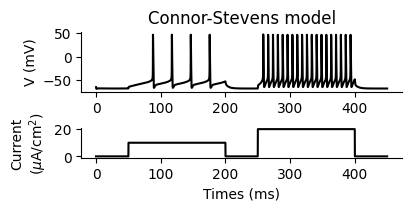

PyObject Text(0.5, 24.0, 'Times (ms)')

In [63]:
fig, axes = subplots(2,1, figsize=(4, 2), height_ratios=[1, 0.5], constrained_layout=true) 
axes[1].set_title("Connor-Stevens model")
axes[1].plot(time, varr_cs[:, 1], color="black"); axes[1].set_ylabel("V (mV)")
axes[2].plot(time, Iext_cs[:, 1], color="black"); 
axes[2].set_ylabel("Current\n"*L"($\mu$A/cm$^2$)"); axes[2].set_xlabel("Times (ms)")

## F-I曲線
HHモデルにおいて，入力電流に対する発火率がどのように変化するかを調べる．次のコードのように入力電流を徐々に増加させたときの発火率を見てみよう．

In [71]:
function fi_curve(NeuronType; num_neurons=200, T=1000, dt=0.04,
                  current_range = [1, 30])
    nt = Int(T/dt) # number of timesteps
    Iext_range = Array{Float32}(range(current_range..., length=num_neurons)) # injection current
    neurons = NeuronType{Float32}(num_neurons=num_neurons, dt=dt) # modelの定義
    varr_fi = zeros(Float32, nt, num_neurons) # 記録用

    # simulation
    for t = 1:nt
        v = neurons(Iext_range)
        varr_fi[t, :] = v
    end
    num_spikes = get_num_spikes(varr_fi)
    rate = num_spikes/T*1e3;
    threshold = Iext_range[findfirst(rate .> 1)[2]]
    return Iext_range, rate, threshold
end

fi_curve (generic function with 1 method)

In [72]:
Iext_range_hh, rate_hh, threshold_hh = fi_curve(HH, current_range = [1, 25])
Iext_range_cs, rate_cs, threshold_cs = fi_curve(CS, current_range = [1, 25]);

発火率を計算して結果を描画する．

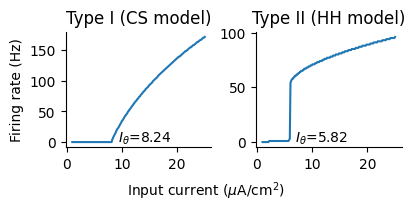

PyObject Text(0.5, 0.020835, 'Input current ($\\mu$A/cm$^2$)')

In [73]:
fig, axes = subplots(1,2, figsize=(4, 2),constrained_layout=true) 
axes[1].set_title("Type I (CS model)")
axes[1].text(threshold_cs+1, 0, L"$I_{\theta}$="*string(round(threshold_cs, digits=2)))
axes[1].plot(Iext_range_cs[:], rate_cs[1, :]); 
axes[1].set_ylabel("Firing rate (Hz)")

axes[2].set_title("Type II (HH model)")
axes[2].text(threshold_hh+1, 0, L"$I_{\theta}$="*string(round(threshold_hh, digits=2)))
axes[2].plot(Iext_range_hh[:], rate_hh[1, :]); 
fig.supxlabel(L"Input current ($\mu$A/cm$^2$)", size=10)

このような曲線を**frequency-current (F-I) 曲線** (または neuronal input/output (I/O) 曲線)と呼ぶ．$I_\theta$は閾値電流を意味する（ここでは発火率が1Hz以上になる点を閾値と設定している）．F-I曲線の種類に応じてType IおよびIIに分けられる\footnote{Type IIIニューロンも存在する}．

## 全か無かの法則の反例
ニューロンは電流が流入することで膜電位が変化し, 膜電位がある一定の閾値を超えると活動電位が発生する, というのはニューロンの活動電位発生についての典型的な説明である．膜電位が閾値を超えるか超えないかで活動電位の発生が決まるという法則を， **全か無かの法則** (all-or-none principle) と呼ぶ．後に説明するLIFモデルなどは，全か無かの法則に従って神経活動のモデル化を行っている．しかし，この全か無かの法則の法則は必ずしも成立するわけではない．反例として **抑制後リバウンド** (Postinhibitory rebound; PIR)という現象がある．抑制後リバウンドは過分極性の電流の印加を止めた際に膜電位が静止膜電位に回復するのみならず, さらに脱分極をして発火をするという現象である．この時生じる発火を**リバウンド発火** (rebound spikes)と呼ぶ．この現象が生じる要因として**アノーダルブレイク** (anodal break, またはanode break excitation; ABE)や，遅いT型カルシウム電流 (slow T-type calcium current) が考えられている {cite:p}`Chik2004-ka`．HH モデルはこのうちアノーダルブレイクを再現できるため, シミュレーションによりどのような現象か確認してみよう．これは入力電流を変更するだけで行える．

In [15]:
T = 450 # ms
dt = 0.01 # ms
nt = Int(T/dt) # number of timesteps
num_neurons = 1 # number of neurons
time = (1:nt)*dt # time array
Ie = repeat(10 * (-(time .> 50) + (time .> 200)) + 20* (-(time .> 250) + (time .> 400)), 1, num_neurons)  # injection current
varr, gatearr = zeros(nt, num_neurons), zeros(nt, 3, num_neurons) # 記録用

hh_neurons = HH{Float32}(num_neurons=num_neurons, dt=dt) # modelの定義

# simulation
@time for t = 1:nt
    v = hh_neurons(Ie[t, :])
    varr[t, :] = v
    gatearr[t, :, :] .= [hh_neurons.m; hh_neurons.h; hh_neurons.n]
end

  0.156089 seconds (2.16 M allocations: 40.442 MiB, 8.09% gc time)


結果は次のようになる．

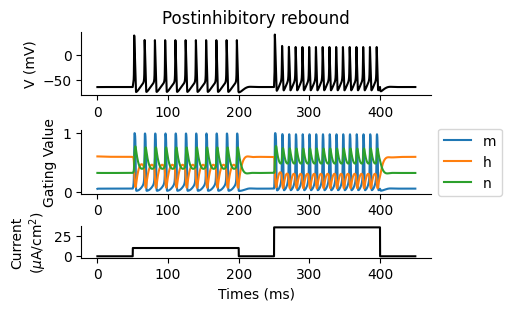

PyObject Text(0.5, 24.0, 'Times (ms)')

In [56]:
fig, axes = subplots(3,1, figsize=(5, 3), height_ratios=[1, 1, 0.5], constrained_layout=true) 
axes[1].set_title("Postinhibitory rebound")
axes[1].plot(time, varr[:, 1], color="black"); axes[1].set_ylabel("V (mV)")

labellist=["m" "h" "n"] 
for i in 1:3
    axes[2].plot(time, gatearr[:, i, 1], label=labellist[i])
end; 
axes[2].set_ylabel("Gating Value"); axes[2].legend(loc="center left", bbox_to_anchor=(1, 0.5))
axes[3].plot(time, Ie[:, 1], color="black"); 
axes[3].set_ylabel("Current\n"*L"($\mu$A/cm$^2$)"); axes[3].set_xlabel("Times (ms)")

なぜこのようなことが起こるか, というと過分極の状態から静止膜電位へと戻る際にNa$^+$チャネルが活性化 (Na$^+$チャネルの活性化パラメータ$m$が増加し, 不活性化パラメータ$h$が減少)し, 膜電位が脱分極することで再度Na$^+$チャネルが活性化する, というポジティブフィードバック過程(**自己再生的過程**)に突入するためである (もちろん, この過程は通常の活動電位発生のメカニズムである)． この際, 発火に必要な閾値が膜電位の低下に応じて下がった, ということもできる．

なお，PIRに関連する現象として抑制後促通 (Postinhibitory facilitation; PIF)がある．これは抑制入力の後に興奮入力がある一定の時間内で入ると発火が起こるという現象である {cite:p}`Dodla2006-fj`．

## 参考文献
```{bibliography}
:filter: docname in docnames
```